# Lab Assignment Two: Exploring Text Data

## 1. Business Understanding

Short Message Service, also known as SMS, is the one of the largest communication standards in the world. SMS is platform independent, and used by most mobile telephone companies in the world. Even though SMS reached its peak of 3.5 billion active users at the end of 2010, its legacy has not diminished. SMS shaped and inspired a revolution of text messaging web and mobile apps in the years since; the world's currently most famous messenger clients such as iMessage, WhatsApp, Facebook Messenger, and WeChat all drew inspiration from SMS.

In 2008, over 70 billion SMS texts were sent *per month* in the US alone. Unfortunately, a large portion of these texts are sent as unwanted, unwarranted advertisements. These unsolicited messages are called **spam**. Spam can be dangerous, because even though most tech savvy individuals can discern a real, genuine message, from malicious advertisements, many portions of the population cannot (especially the elderly and not tech savvy). Thus, it is important to accurately automate the process of filtering spam SMS from a user's phone in the first place.

The dataset we chose is an SMS Spam Collection Dataset, where each of the 5,574 messages are tagged according to being **spam**, or **ham** (legitimate). This data was collected in the first place in order to properly identify which words are commonly associated with spam messages. The document contains over 90,000 words. Once we begin modelling, our prediction algorithm would need to perform to at least a 50% usage rate in order to beat random. However, in an ideal world in which an automated system should filter out all messages, our team's personal goal would be to beat at least 90% to ensure a clean messaging client for all.

---

Link to Dataset: https://www.kaggle.com/uciml/sms-spam-collection-dataset/kernels

--- 

## 2. Data Encoding As String

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/spam.csv', encoding = 'latin1') 
df = df.rename(index=str, columns={"v1": "classification", "v2": "message"})

In [4]:
df.head()

,classification,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 2.1 Data Input as Strings

### 2.2 Data Quality Verification

### 2.3 Bag of Words Representation

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

simple_train_dtm = vect.fit_transform(df['message'])
#simple_train_dtm.toarray()
#print(simple_train_dtm)

df_vectorized = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
print(vect.vocabulary_)

{'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'and': 1084, 'n

In [80]:
sorted_df = df_vectorized.sum().sort_values()
temp_df = df_vectorized[df_vectorized.columns[df_vectorized.sum() > 0]]
print("Number of vectorized words: ",len(sorted_df))
double_t_df = temp_df[temp_df.columns].sum() < 50
print("Number of vectorized words with more than 1 occurrence: ", len(double_t_df))

x = []
y = []
for i in range(0, 50):
    x.append(i)
    y_counter = 0
    asdf = temp_df[temp_df.columns].sum() == i
    for a in asdf:
        if a:
            y_counter +=1
    y.append(y_counter)
    
print("Length of y: ", len(y))
print(y)

frequency_d = {'frequency': y}
frequency_df = pd.DataFrame(data=frequency_d)


#print(temp_df[temp_df.columns].sum().sort_values())

Number of vectorized words:  8672
Number of vectorized words with more than 1 occurrence:  8672
Length of y:  50
[0, 4374, 1416, 649, 378, 241, 183, 166, 122, 97, 82, 59, 55, 56, 43, 42, 30, 34, 25, 28, 22, 26, 24, 20, 15, 16, 16, 16, 11, 17, 7, 16, 21, 11, 8, 7, 8, 4, 13, 12, 4, 5, 7, 11, 5, 4, 6, 2, 1, 3]


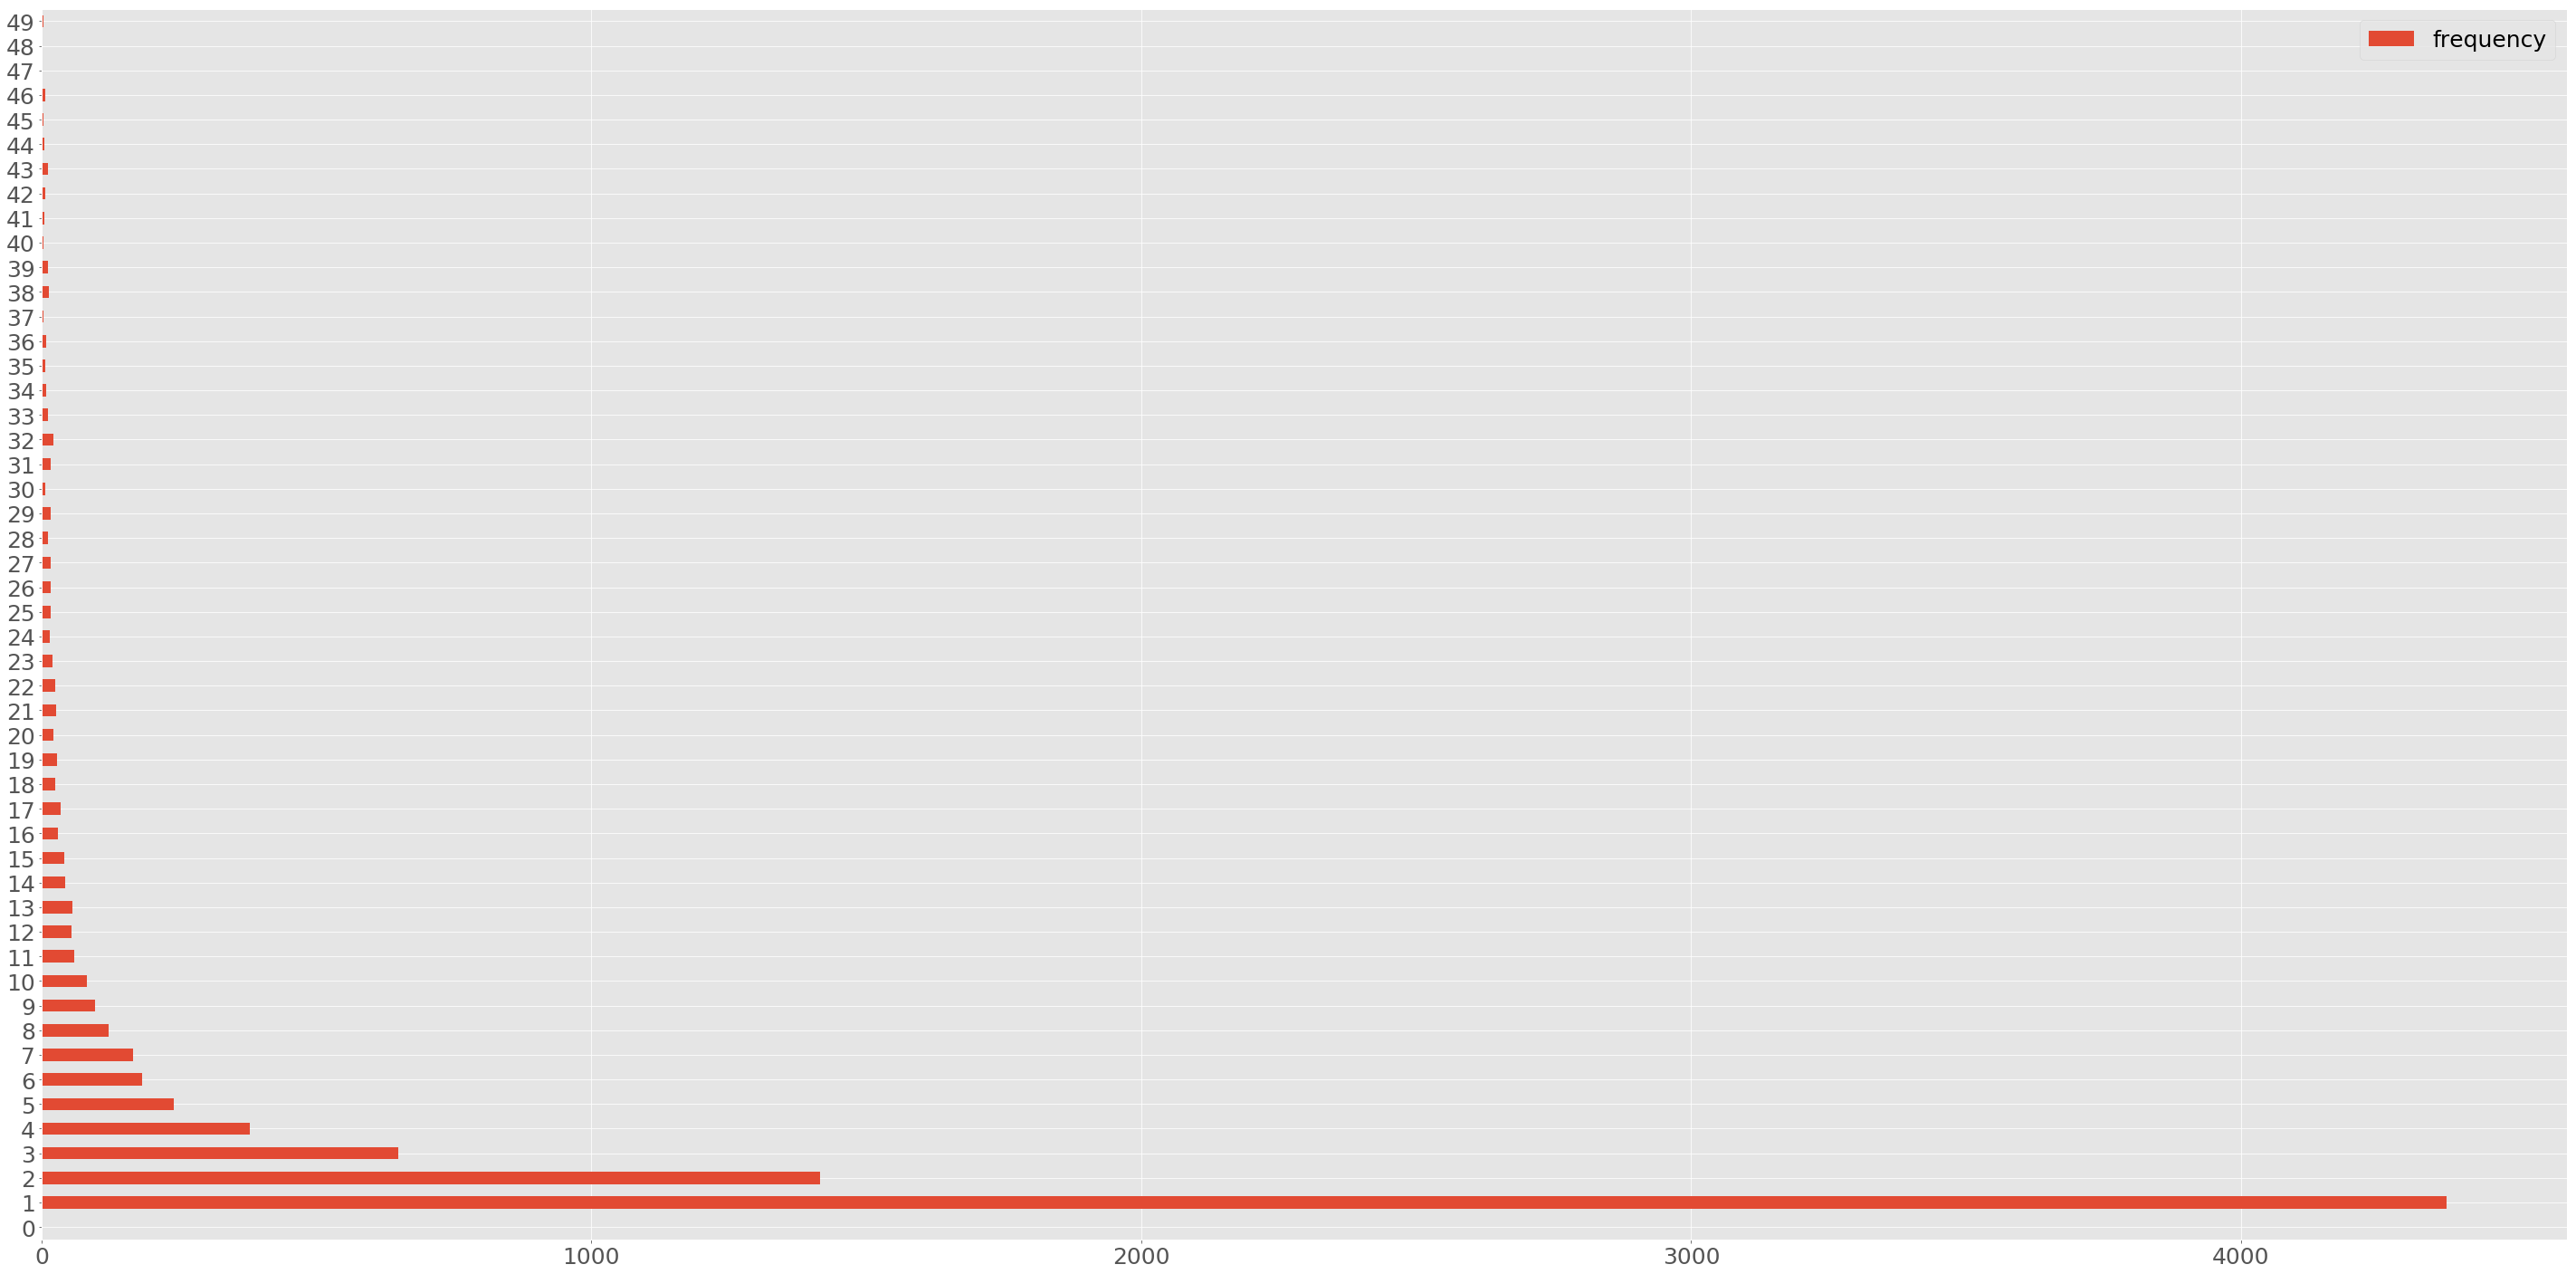

In [82]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('ggplot')

matplotlib.rcParams.update({'font.size': 25})
ax = frequency_df.plot(kind='barh', figsize=(50,25))


In [43]:
print(len(temp_df[temp_df.columns[temp_df.sum() == 2]]))

5572


### 2.4 tf-idf Representation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english',
                             max_df=0.01,
                             min_df=4)
tfidf_mat = tfidf_vect.fit_transform(df['message'])
df_tfidf = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
print(df_tfidf)

       00       000   02   03   04   05   06  0800  08000839402  08000930705  \
0     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
1     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
2     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
3     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
4     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
5     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
6     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
7     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
8     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
9     0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
10    0.0  0.000000  0.0  0.0  0.0  0.0  0.0   0.0          0.0          0.0   
11    0.0  0.298721  0.0  0.0  0.0  0.0 

## 3. Data Visualization

### 3.1 Statistical Summaries Visualized

### 3.2 Most Common Relevant Words

## 4. Word Cloud